<a href="https://colab.research.google.com/github/Arunimad/CCIR_NetworkScience/blob/main/TA4_AlgoX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NetowrkX and AlgorithmX**

In [ ]:
pip install networkx

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()

nx.add_path(G, [1, 2, 3])
nx.add_path(G, [4, 2, 5])

print('Nodes:', G.nodes)
print('Edges:', G.edges)

Nodes: [1, 2, 3, 4, 5]
Edges: [(1, 2), (2, 3), (2, 4), (2, 5)]


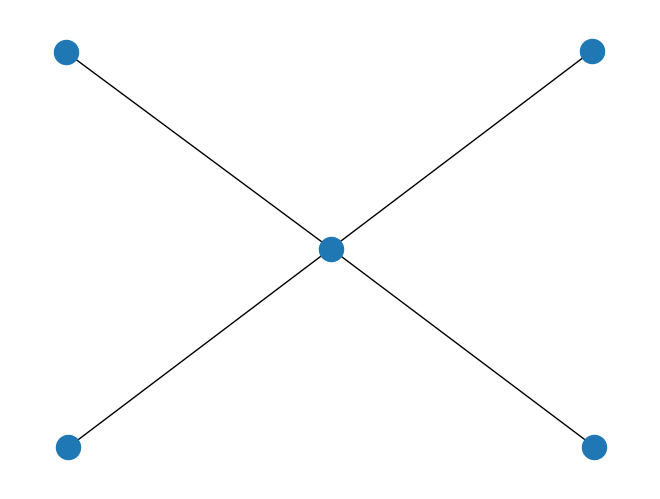

In [ ]:
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

In [ ]:
pip install algorithmx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.6 MB/s eta 0:00:00


In [ ]:
pip --version

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
##No use. Only use it when the above lines are not working

from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from algorithmx import jupyter_canvas

In [ ]:

canvas = jupyter_canvas()

canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"1": {}, "2": {}, "3": {}, "4": {}, "5": {}}}}', '{"attrs": {"edge…

In [ ]:
display(canvas)

In [ ]:
canvas = jupyter_canvas()

node_colors = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange', 5: 'purple'}

canvas.nodes(G.nodes).add(
    shape='rect',
    size=(20, 12),
    color=lambda n: node_colors[n]
)
canvas.edges(G.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"1": {"shape": "rect", "size": [20, 12], "color": "red"}, "2": {"s…

**Weighted and Directed Graphs**

Directed graph

A directed graph, also called a digraph, is a graph in which the edges have a direction. This is usually indicated with an arrow on the edge; more formally, if v and w are vertices, an edge is an unordered pair {v,w}, while a directed edge, called an arc, is an ordered pair (v,w) or (w,v).

In [ ]:
G = nx.DiGraph()

G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (2,1),(2, 3), (3, 1)])

canvas = jupyter_canvas()

canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add(directed=True)

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"1": {}, "2": {}, "3": {}}}}', '{"attrs": {"edges": {"1-2": {"sour…

Adding weight:
To create wighted graph, we will first ensure that our NetworkX edges have a ‘weight’ attribute. Then, we will add a label to each edge displaying the attribute.

In [ ]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3])
G.add_weighted_edges_from([(1, 2, 4), (2, 3, 0.2), (3, 1, 0.3)])

canvas = jupyter_canvas()

canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add(
    labels=lambda e: {0: {'text': G.edges[e]['weight']}}
)

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"1": {}, "2": {}, "3": {}}}}', '{"attrs": {"edges": {"1-2": {"sour…

AlgortihmX feature

In [ ]:
from algorithmx.networkx import add_graph

canvas = jupyter_canvas()
add_graph(canvas, G)

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"1": {}, "2": {}, "3": {}}}}', '{"attrs": {"edges": {"1-2": {"sour…

In [ ]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3])
G.add_weighted_edges_from([(1, 2, 4), (2, 3, 0.2), (3, 1, 0.3)])

canvas = jupyter_canvas()
add_graph(canvas,G)



JupyterWidget(events=['{"attrs": {"nodes": {"1": {}, "2": {}, "3": {}}}}', '{"attrs": {"edges": {"1-2": {"sour…

In [ ]:
G = nx.Graph()

nx.add_path(G,[1,2,3])
#G.add_nodes_from([1, 2, 3])
#G.add_weighted_edges_from([(1, 2, 4), (2, 3, 0.2), (3, 1, 0.3)])

canvas = jupyter_canvas()
add_graph(canvas,G)

JupyterWidget(events=['{"attrs": {"nodes": {"1": {}, "2": {}, "3": {}}}}', '{"attrs": {"edges": {"1-2": {"sour…

**Random graphs**

In [ ]:
G = nx.gnp_random_graph(20, 0.3, 5)

canvas = jupyter_canvas()
canvas.nodes(G.nodes).add()
canvas.edges(G.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {}, "1": {}, "2": {}, "3": {}, "4": {}, "5": {}, "6": {}, "7"…

To make the graph directed, we will simply use G.to_directed. To make the graph weighted, we will need to configure a weight attribute for each edge. Since our graph is random, we’ll make our edge weights random as well.

In [ ]:
from random import randint

G = G.to_directed()
nx.set_edge_attributes(G, {e: {'weight': randint(1, 10)} for e in G.edges})
canvas = jupyter_canvas()
add_graph(canvas, G)

JupyterWidget(events=['{"attrs": {"nodes": {"0": {}, "1": {}, "2": {}, "3": {}, "4": {}, "5": {}, "6": {}, "7"…

**Detailed graph**

Now we are going to create a graph that displays a range of interesting properties. Let’s begin by generating a random weighted graph, as before.

In [ ]:
from random import randint
G = nx.gnp_random_graph(10, 0.3, 201)
nx.set_edge_attributes(G, {e: {'weight': randint(1,10)} for e in G.edges})

Next, we will use NetworkX to calculate the graph’s coloring and edge centrality.

In [ ]:
coloring = nx.greedy_color(G)
centrality = nx.edge_betweenness_centrality(G, weight='weight', normalized=True)

We can now begin displaying the graph. First, we will add the nodes and assign them a color based on their calculated priority. We happen to know that any planar graph requires at most 4 different colors, and so we prepare these beforehand.

In [ ]:
canvas = jupyter_canvas()

color_priority = {0: 'red', 1: 'orange', 2: 'yellow', 3: 'green'}

canvas.nodes(G.nodes).add() \
    .color(lambda n: color_priority[coloring[n]])

print(coloring)

{4: 0, 2: 1, 3: 2, 0: 1, 1: 2, 6: 0, 8: 1, 7: 2, 9: 2, 5: 0}


Afterwards, we will add the edges. Each one will have two labels; one to display it’s weight, and another to display it’s calculated centrality.

In [ ]:
formatted_centrality = {k: '{0:.2f}'.format(v) for k, v in centrality.items()}

init_edges = canvas.edges(G.edges).add()


init_edges.label().add(
     text=lambda e: G.edges[e]['weight']
)
init_edges.label('centrality').add(
     color='blue',
     text=lambda e: formatted_centrality[e]
)

print(formatted_centrality)

{(0, 1): '0.07', (0, 3): '0.22', (0, 4): '0.00', (1, 4): '0.09', (1, 8): '0.04', (2, 3): '0.06', (2, 4): '0.33', (2, 5): '0.20', (2, 6): '0.01', (2, 7): '0.13', (3, 4): '0.26', (3, 6): '0.21', (4, 8): '0.00', (4, 9): '0.31', (6, 7): '0.07', (8, 9): '0.20'}


Finally, we display the whole graph.

In [ ]:
canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {}, "1": {}, "2": {}, "3": {}, "4": {}, "5": {}, "6": {}, "7"…

In [ ]:
#clusdtering for single node
print(nx.clustering(G))
nx.average_clustering(G)

**Minimum spanning tree**

https://www.tutorialspoint.com/parallel_algorithm/graph_algorithm.htm

https://www.geeksforgeeks.org/prims-minimum-spanning-tree-mst-greedy-algo-5/

https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/

